Linear Regression without Sk-learn (done with the basic wx+b formula to understand the theory through practical implementation)

In [11]:
import pandas as pd # data-set manipulation
import numpy as np # calcualting heavy mathematic and model data nd-array
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

data_path = r"C:\Users\anany\Downloads\archive\House_Rent_Dataset.csv"
house_data = pd.read_csv(data_path, index_col="Posted On")
house_data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
#to see the shape and size of the dataset 
house_data.shape , house_data.size

((4746, 11), 52206)

In [13]:
#info about the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 2022-05-18 to 2022-05-04
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.9+ KB


From running the above code we can find out if there are any null values, what are data types for each column, number of entries in total, number of non null values per column etc

In [14]:
#data summary 
house_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


From running the above code block we can find the column wise statistical summary of the data (mean, count, min, max etc)

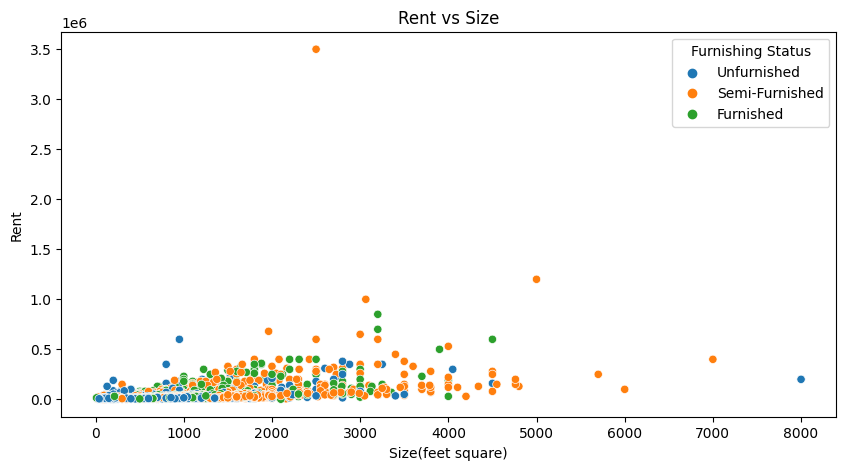

In [15]:
plt.figure(figsize=(10,5))
plt.title("Rent vs Size")
plt.xlabel("Size(feet square)")
plt.ylabel("Rent")
# sns.scatterplot(x=house_data['City'],y=house_data['Rent'])
sns.scatterplot(x=house_data['Size'],y=house_data['Rent'],hue=house_data['Furnishing Status'])
plt.show()

Using size as feature (x) and rent as target (y)

In [16]:
x = house_data["Size"]
y = house_data["Rent"]
y[:5]

Posted On
2022-05-18    10000
2022-05-13    20000
2022-05-16    17000
2022-07-04    10000
2022-05-09     7500
Name: Rent, dtype: int64

In [17]:
def linreg(w,x,b):
    """
    linreg : Linear Regression
    w - weight
    x - feature
    b - bias
    yhat - returned value
   
    """
    yhat = ((w*x) + b)
    return yhat

In [18]:
#cost function
def cost(yhat,y):
  
    m = y.shape[0]
    err = sum((yhat-y)**2)/(2*m)
    
    return err

In [19]:
w = 0,
b = 0
yhat = linreg(w,x,b) 
error = cost(yhat,y)

3661933977.985251

In [22]:
#to check prediction
yhat

Posted On
2022-05-18    0
2022-05-13    0
2022-05-16    0
2022-07-04    0
2022-05-09    0
             ..
2022-05-18    0
2022-05-15    0
2022-07-10    0
2022-07-06    0
2022-05-04    0
Name: Size, Length: 4746, dtype: int64

***********************************************************************************************

Linear Regression with Sk-learn

***********************************************************************************************

In [29]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [30]:
dp = r"C:\Users\anany\Downloads\archive\House_Rent_Dataset.csv"
hd = pd.read_csv(dp, index_col="Posted On")
hd.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


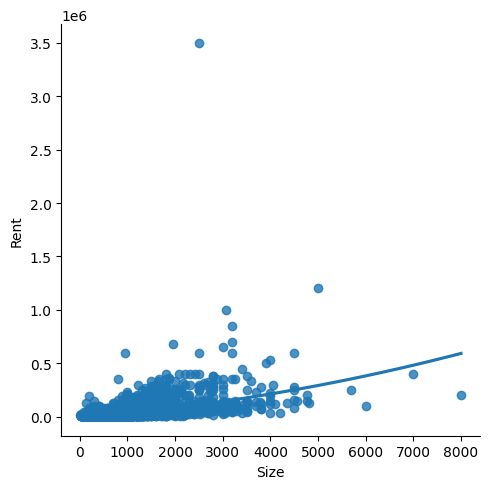

In [31]:
sns.lmplot(x ="Size", y ="Rent", data = hd, order = 2, ci = None)

In [33]:
X = np.array(hd['Size']).reshape(-1, 1)

y = np.array(hd['Rent']).reshape(-1, 1)

# Separating the data into independent and dependent variables and converting each dataframe into a numpy array (since each dataframe contains only one column)

hd.dropna(inplace = True)

# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.23250676399172743


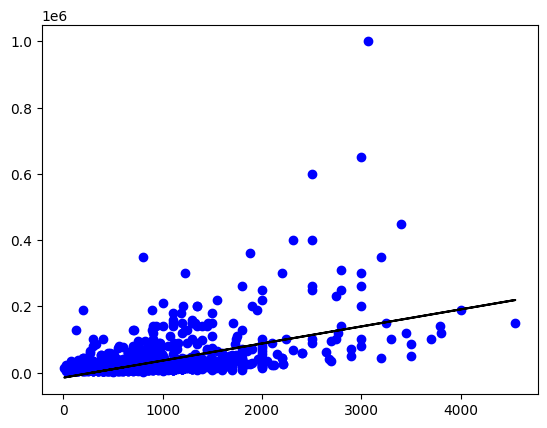

In [34]:
#Scatter plot of predicted values

y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color ='b')

plt.plot(X_test, y_pred, color ='k')

plt.show()

*************************************************************
working with a part of the dataset (first 500 rows)
************************************************************

C:\Users\anany\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


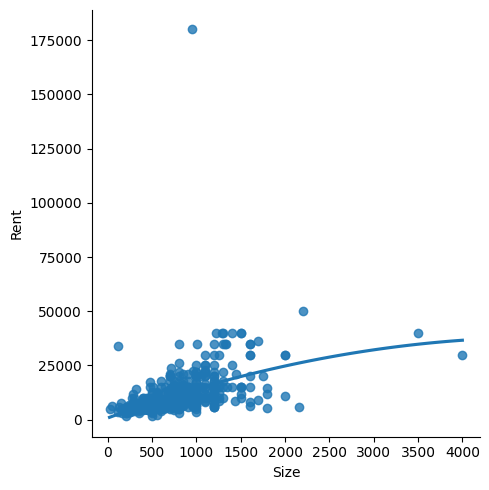

In [35]:
hd500 = hd[:][:500]

sns.lmplot(x ="Size", y ="Rent", data = hd500, order = 2, ci = None)

0.06115019366675789


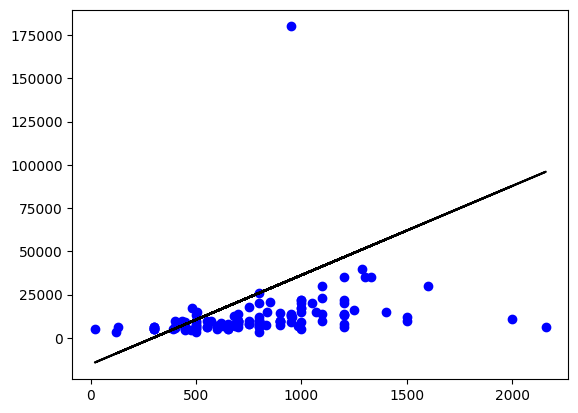

In [36]:
hd500.fillna(method ='ffill', inplace = True)

X1 = np.array(hd500['Size']).reshape(-1, 1)

y1 = np.array(hd500['Rent']).reshape(-1, 1)

hd500.dropna(inplace = True)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25)

regr1 = LinearRegression()

regr1.fit(X1_train, y1_train)

print(regr1.score(X1_test, y1_test))

y1_pred = regr.predict(X1_test)

plt.scatter(X1_test, y1_test, color ='b')

plt.plot(X1_test, y1_pred, color ='k')

plt.show()

In [39]:
#Evaluating the model (of the complete dataset)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.23250676399172743
